# Dev Notebook
The objective is to load and display the medical images

In [29]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import dicom

In [30]:
path  = "/home/popszer/Documents/ei3/petML/data/001-026/"
listFilesDCM = []

In [32]:
for dirName, subDirList, fileList in os.walk(path):
    for fileName in fileList:
        if ".dcm" in fileName.lower():
            listFilesDCM.append(os.path.join(dirName, fileName))
            
# Get ref file
RefDs = dicom.read_file(listFilesDCM[0])

# Load dimensions based on the number of rows, columns, and slices (along the Z axis)
ConstPixelDims = (int(RefDs.Rows), int(RefDs.Columns), len(listFilesDCM))

# Load spacing values (in mm)
ConstPixelSpacing = (float(RefDs.PixelSpacing[0]), float(RefDs.PixelSpacing[1]), float(RefDs.SliceThickness))

x = np.arange(0.0, (ConstPixelDims[0]+1)*ConstPixelSpacing[0], ConstPixelSpacing[0])
y = np.arange(0.0, (ConstPixelDims[1]+1)*ConstPixelSpacing[1], ConstPixelSpacing[1])
z = np.arange(0.0, (ConstPixelDims[2]+1)*ConstPixelSpacing[2], ConstPixelSpacing[2])

# The array is sized based on 'ConstPixelDims'
ArrayDicom = np.zeros(ConstPixelDims, dtype=RefDs.pixel_array.dtype)

# loop through all the DICOM files
for filenameDCM in listFilesDCM:
    # read the file
    ds = dicom.read_file(filenameDCM)
    # store the raw image data
    ArrayDicom[:, :, listFilesDCM.index(filenameDCM)] = ds.pixel_array  


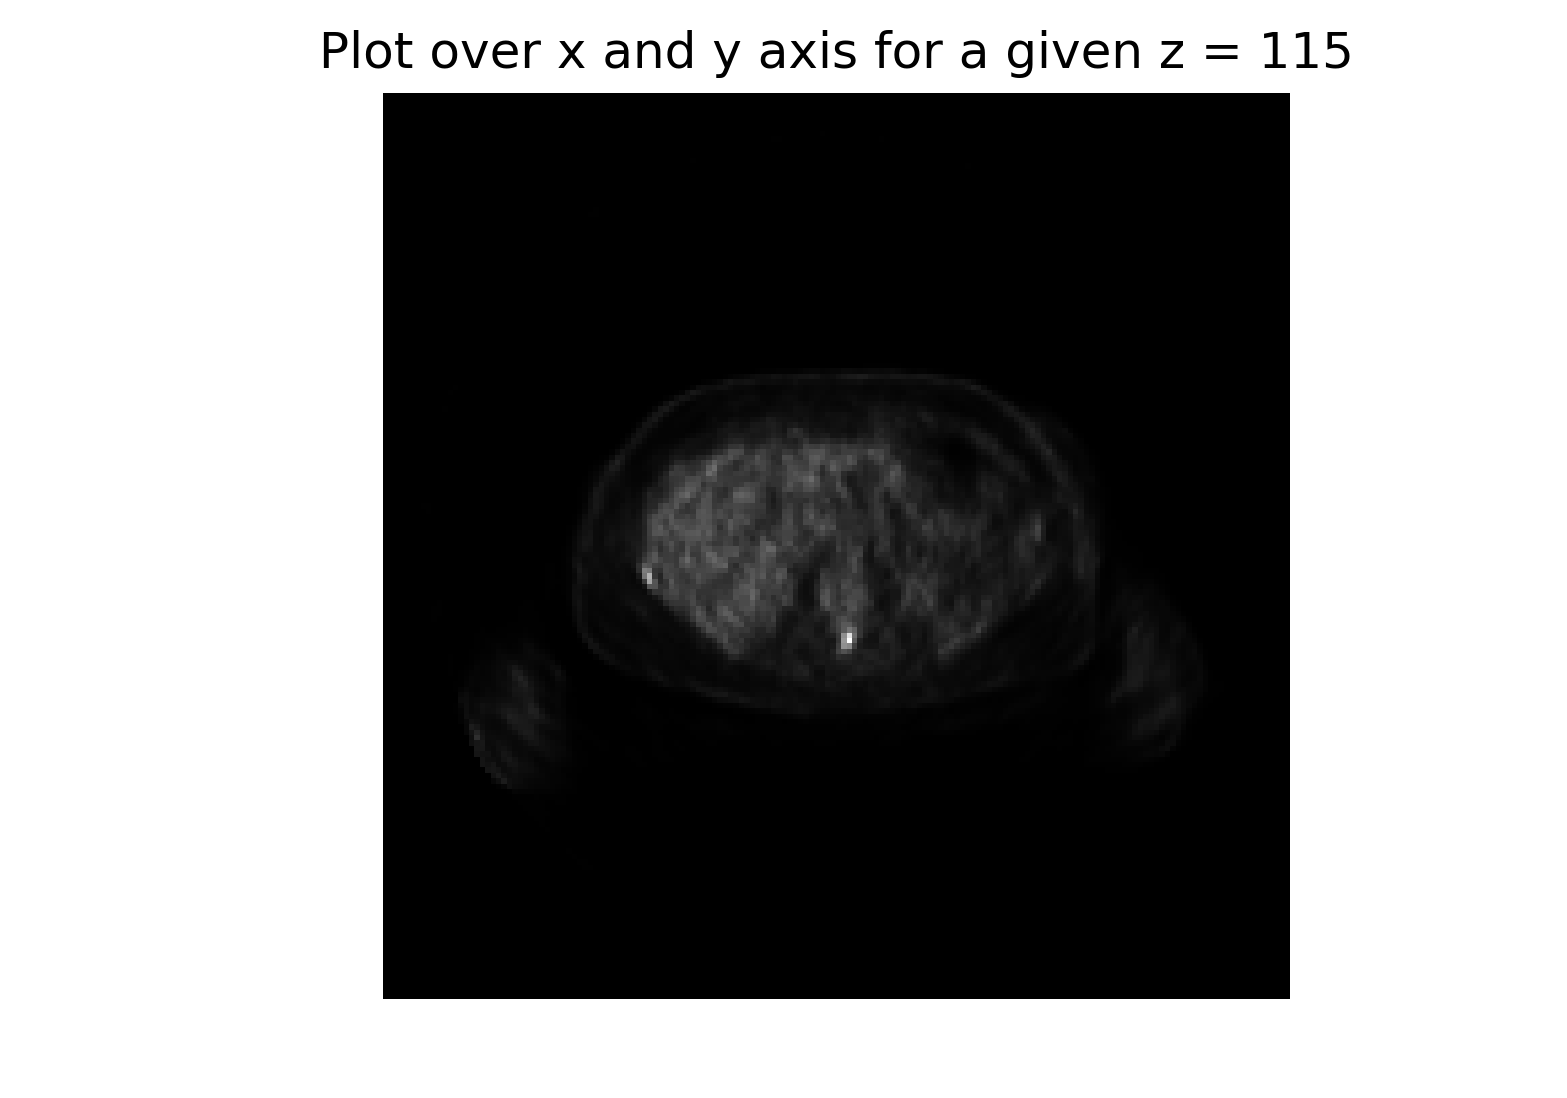

In [53]:
plt.figure(dpi=300)
plt.axes().set_aspect('equal', 'datalim')
plt.set_cmap(plt.gray())
plt.axis('off')
zval = 115
plt.title("Plot over x and y axis for a given z = %i" % zval)
plt.pcolormesh(x, y, np.flipud(ArrayDicom[:, :, zval]))
plt.show()